<table >
    <colgroup>
       <col span="1" style="width: 10%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../FH_Koblenz.svg" width="80%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
</table>


# Elektronik I

## Grundlagenwiederholung 

### periodische Funktionen, Fourier-Reihe

Periodische Funktionen sind in die Fourier-Reihen zerlegbar. Es wurden durch den Code einige periodische Funktionen aus Beispielen übernommen, um den harmonischen Inhalt sowie den Klang bei 440 Hz zu analysieren. Damit kann man analysieren und auch hören, was der harmonische Inhalt bedeutet.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

def f_four(wt, f, nh): # Fourier-Reihe Funktion
    '''
    wt: Kreisfrequenz
    f: Funktion, abhängig von wt
    nh: Anzahl der Harmonischen
    '''    
    # Berechnung des Koeffizienten ao (der Mittelwert der Funktion)
    ao = 2 / (wt[-1] - wt[0]) * np.trapz(f, wt)
    
    # Initialisierung der Listen für die Fourier-Koeffizienten an und bn
    an, bn = [], []
        
    # Schleife zur Berechnung der Fourier-Koeffizienten an und bn für jede Harmonische
    for n in range(1, nh + 1):
        # Berechnung des Koeffizienten an (Kosinus-Komponente)
        a = 2 / (wt[-1] - wt[0]) * np.trapz(f * np.cos(n * wt), wt)
        
        # Berechnung des Koeffizienten bn (Sinus-Komponente)
        b = 2 / (wt[-1] - wt[0]) * np.trapz(f * np.sin(n * wt), wt)
        
        # Hinzufügen der berechneten Koeffizienten an und bn zu den Listen
        an = np.append(an, a)
        bn = np.append(bn, b)       
    
    # Rückgabe des Mittelwertes ao sowie der Listen der an- und bn-Koeffizienten
    return ao, an, bn

def fourier_plot_sound(wt,f,nh): # t: array de tempo f: array da função nf: número de harmônicas ti: início do período e tf: fim do período
    '''
    wt:Kreisfrequenz
    f:Funktion, abhängig von wt
    nh: Anzahl der Harmonischen
    '''
    
    ao,an,bn=f_four(wt,f,nh)
    
    f_for=ao/2+sum((an[n]*np.cos((n+1)*wt)+bn[n]*np.sin((n+1)*wt)) for n in range(len(an)))

    fig=plt.figure(figsize=(10, 3)) # cria a figura e define o tamanho

    ax0=fig.add_subplot(1,2,1)
    ax0.plot(wt,f) # plota a função
    ax0.plot(wt,f_for) # plota a função
    ax0.grid() # formata a figura para ter grid
    
    if min(f)<-10:
        fi=-10
    else:
        fi=min(f)-.5
    
    if max(f)>10:
        ff=10
    else:        
        ff=max(f)+.5
               
    ax0.set_ylim(fi,ff)
    ax0.set_xlim(wt[0],wt[-1])
    
    ax1=fig.add_subplot(1,2,2)
    ax1.bar(range(1,len(an)+1),abs(an-1j*bn)) # plota a função fourier
    ax1.bar([0],[abs(ao)]) # plota a função fourier
    ax1.grid() # formata a figura para ter grid
    
    sr = 22050 # sample rate
    T = 2.0    # seconds
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    
    f=440
    w=2*np.pi*f
    
    f_for=ao/2+sum((an[n]*np.cos((n+1)*w*t)+bn[n]*np.sin((n+1)*w*t)) for n in range(len(an)))
    
    x = 0.01*np.tan(2*np.pi*440*t)                # pure sine wave at 440 Hz

    display(Audio(f_for, rate=sr))
     
    return

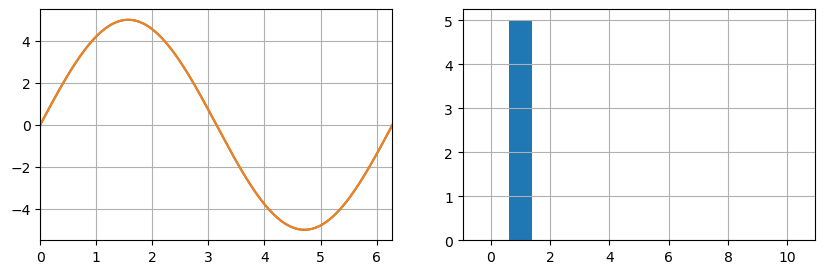

In [6]:
#Sinus
wt=np.linspace(0,2*np.pi,1000) # cria um vetor numérico para a variável wt
f=5*np.sin(wt)

fourier_plot_sound(wt,f,10)

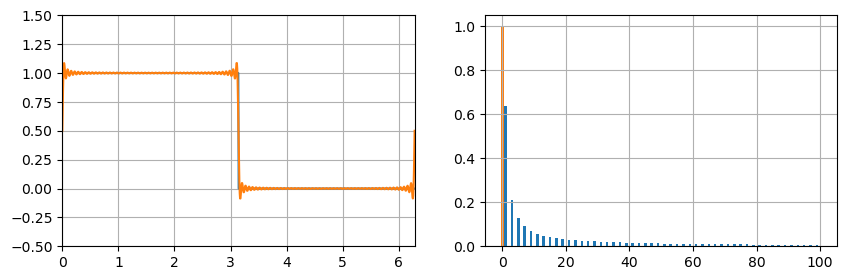

In [7]:
#Rechtecksignal
Dc=0.5
wtn=np.linspace(0,2*np.pi,1000)

f[wtn<=2*np.pi*Dc]=1
f[wtn>2*np.pi*Dc]=0

fourier_plot_sound(wt,f,100)

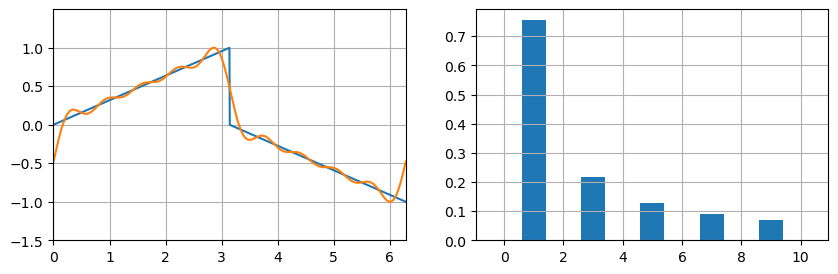

In [44]:
# Funktion ohne gerade Harmonische: f(t)=−f(t+T/2), T: Periodendauer
wt=np.linspace(0,2*np.pi,1000) # cria um vetor numérico para a variável wt

f[wt<=np.pi]=wt[wt<=np.pi]/np.pi
f[wtn>np.pi]=-(wtn[wtn>np.pi]-np.pi)/np.pi

fourier_plot_sound(wt,f,10)

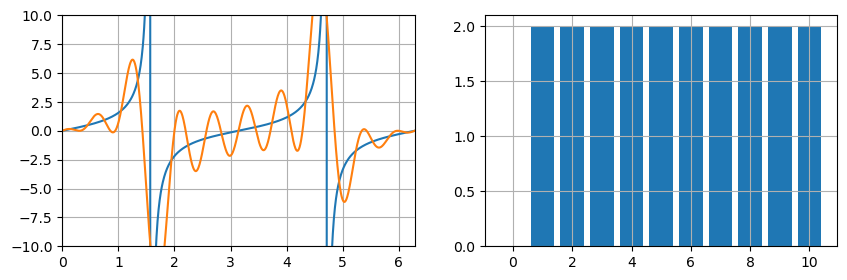

In [8]:
# Tangensfunktion
wt=np.linspace(0,2*np.pi,1000) # cria um vetor numérico para a variável wt

f=np.tan(wt)

fourier_plot_sound(wt,f,10)